In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
##data analysis

In [215]:
train=pd.read_csv('train.csv')

In [213]:
test.columns

Index(['weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP', 'region',
       'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth',
       'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative',
       'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [3]:
valid=pd.read_csv('validation.csv')
test=pd.read_csv('test.csv')

In [4]:
train.shape,valid.shape,test.shape

((2430981, 25), (303925, 25), (303375, 22))

In [216]:
#train=train[train.bidprice>=train.payprice]
train=train[train.payprice>=train.slotprice]
#validation=validation[validation.bidprice>=validation.payprice]
valid=valid[valid.payprice>=valid.slotprice]

In [217]:
sum(train.click==1),sum(train.click==0)

(1786, 2416792)

In [6]:
group=pd.read_csv('Group_xx.csv')

In [136]:
part=train[0:10].copy()

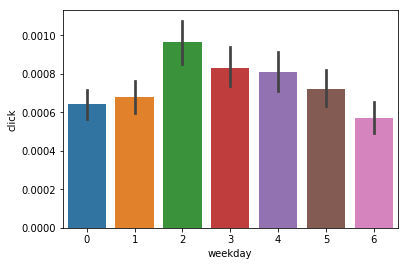

In [8]:
sns.barplot('weekday','click',data=train)ki

In [142]:
city=train.groupby('city')

In [143]:
d=city.get_group(1)

In [146]:
day=train.groupby('advertiser')

In [149]:
data1458=day.get_group(1458)
data3386=day.get_group(3386)

In [203]:
def getdata(string):
    click1458 = pd.DataFrame()
    click1458[string] = np.sort(train[string].unique())
    click1458['eCPC']=0
    for i in click1458[string].values:
        clicknum=sum(t1458[t1458[string]==i].click==1)
        if clicknum>0:
            click1458.loc[click1458[string]==i,'eCPC']=sum(t1458[t1458[string]==i].payprice)/clicknum/1000
        else:
            click1458.loc[click1458[string]==i,'eCPC']=0
    click1458['advertiser']=1458

    t3386=train[train.advertiser==3386]
    click3386 = pd.DataFrame()
    click3386[string] = np.sort(train[string].unique())
    click3386['eCPC']=0
    for i in click3386[string].values:
        clicknum=sum(t3386[t3386[string]==i].click==1)
        if clicknum>0:
            click3386.loc[click3386[string]==i,'eCPC']=sum(t3386[t3386[string]==i].payprice)/clicknum/1000
        else:
            click3386.loc[click3386[string]==i,'eCPC']=0
    click3386['advertiser']=3386
    
    return click1458,click3386

In [204]:
click1458,click3386=getdata('weekday')

In [205]:
hour1458,hour3386=getdata('hour')
platform1458,platform3386=getdata('platform')
browser1458,browser3386=getdata('browser')

In [206]:
adexchange1458,adexchange3386=getdata('adexchange')
slotsize1458,slotsize3386=getdata('slotsize')
region1458,region3386=getdata('region')

In [207]:
adexchange1458=adexchange1458.loc[0:2]
adexchange3386=adexchange3386.loc[0:2]
to_plot = click1458
to_plot1 = hour1458
to_plot2 = platform1458
to_plot3 = browser1458
to_plot4 = adexchange1458
to_plot5= slotsize1458

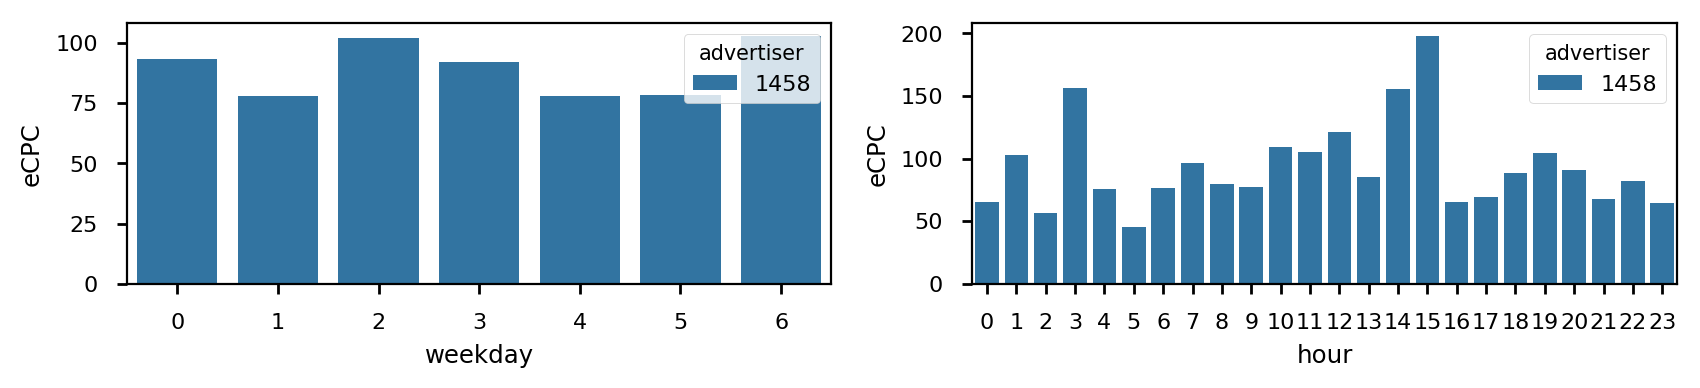

In [208]:
plt.figure(figsize=(10,10), dpi=200)
ax1 = plt.subplot2grid((5, 2), (0, 0), colspan=1)
sns.barplot(x='weekday', y='eCPC', data=to_plot, hue='advertiser',ax=ax1)
ax2 = plt.subplot2grid((5, 2), (0, 1), colspan=1)
ax2= sns.barplot(x='hour', y='eCPC', data=to_plot1, hue='advertiser')

In [211]:
to_plot6

,region,eCPC,advertiser
0,0,76.000167,1458
1,1,91.354588,1458
2,2,141.271500,1458
3,3,81.169810,1458
4,15,69.386000,1458
5,27,159.305333,1458
6,40,112.215909,1458
7,55,148.573800,1458
8,65,67.123667,1458
9,79,76.784714,1458


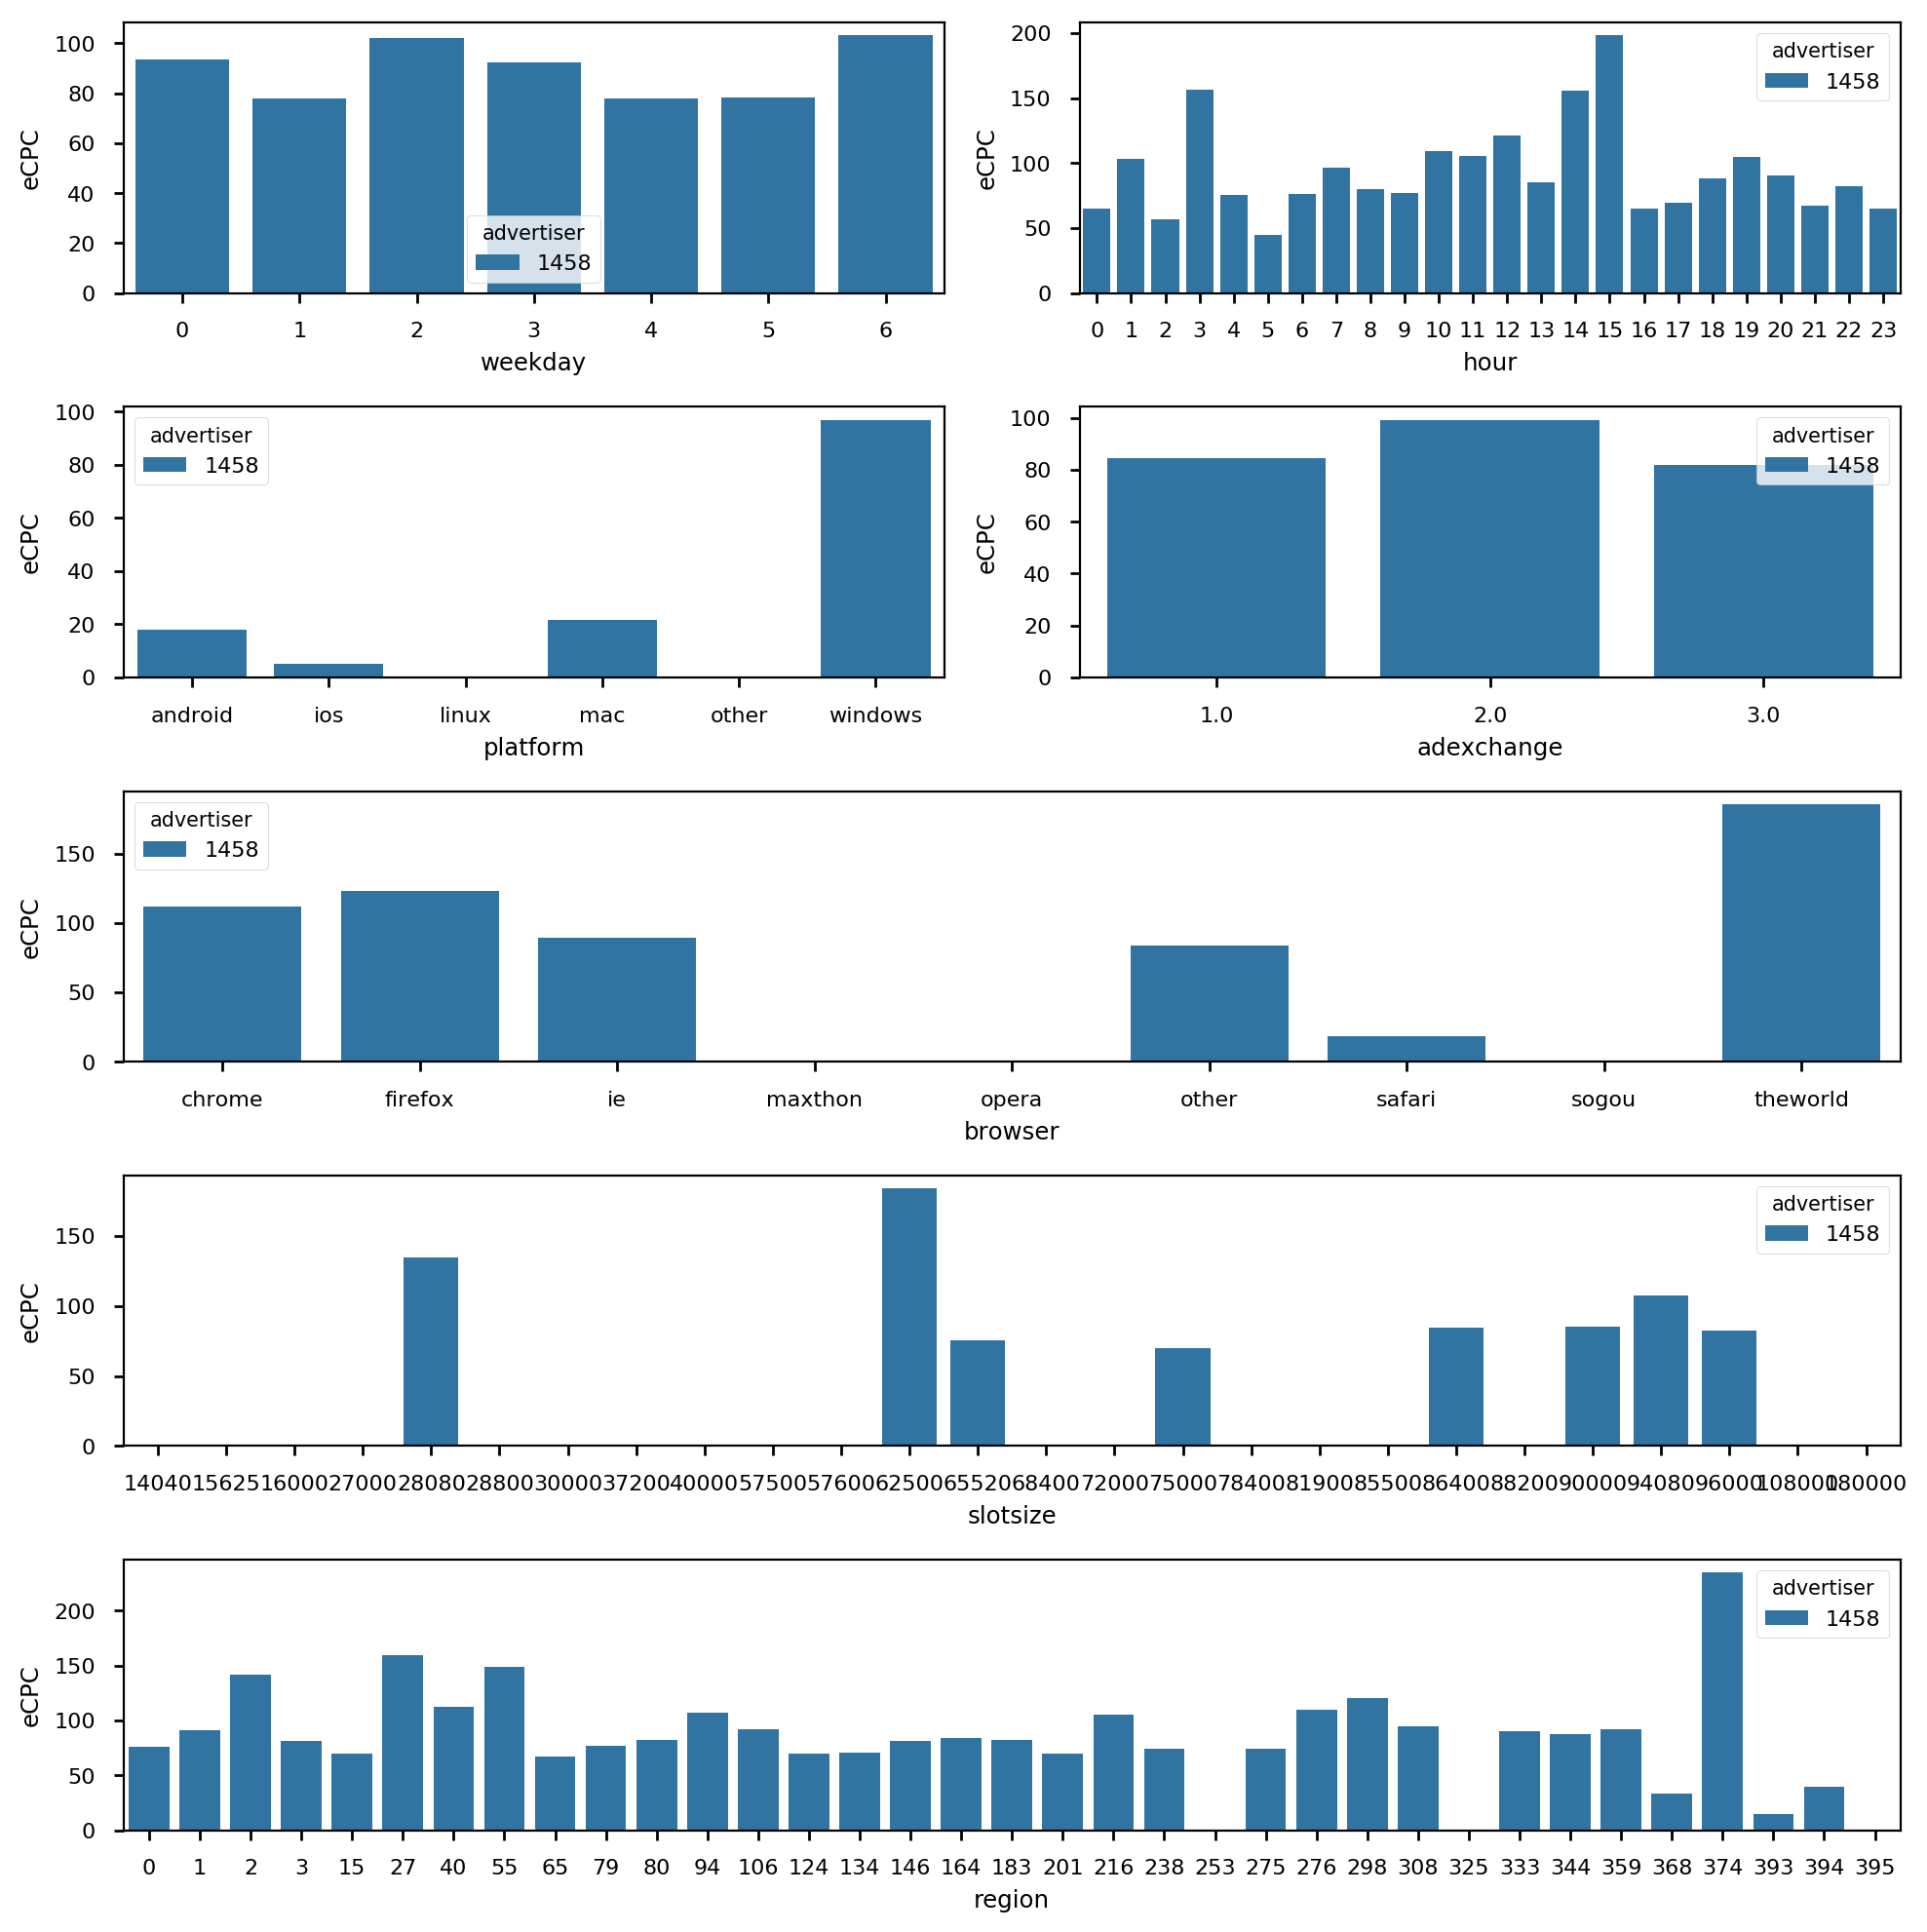

In [209]:
to_plot6= region1458


plt.figure(figsize=(10,10), dpi=200)
#sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 1.5})
ax1 = plt.subplot2grid((5, 2), (0, 0), colspan=1)
#sns.set_context( font_scale=1.5, rc={"lines.linewidth":1})
ax1=sns.barplot(x='weekday', y='eCPC', data=to_plot, hue='advertiser')
#plt.close()

ax2 = plt.subplot2grid((5, 2), (0, 1), colspan=1)
ax2=sns.barplot(x='hour', y='eCPC', data=to_plot1, hue='advertiser')
#plt.close()

ax3 = plt.subplot2grid((5, 2), (1, 0), colspan=1)
ax3=sns.barplot(x='platform', y='eCPC', data=to_plot2, hue='advertiser')
#plt.close()

ax4 = plt.subplot2grid((5, 2), (2, 0), colspan=2)
ax4=sns.barplot(x='browser', y='eCPC', data=to_plot3, hue='advertiser')
#plt.close()

ax5 = plt.subplot2grid((5, 2), (1, 1), colspan=1)
ax5=sns.barplot(x='adexchange', y='eCPC', data=to_plot4, hue='advertiser')
#plt.close()

ax6 = plt.subplot2grid((5, 2), (3, 0), colspan=2)
ax6=sns.barplot(x='slotsize', y='eCPC', data=to_plot5, hue='advertiser')

#plt.close()

ax7 = plt.subplot2grid((5, 2), (4, 0), colspan=2)
ax7=sns.barplot(x='region', y='eCPC', data=to_plot6, hue='advertiser')

#plt.close()

plt.tight_layout()
plt.savefig('eCPC.png')
plt.show()

In [11]:
#ctr  part.loc[part.weekday>3,'weekday']=7;part
import copy
from prettytable import PrettyTable

def analysis(ad,total):
    
    ad['Cost']=np.rint(total.groupby('advertiser').agg({'payprice':np.sum})/1000)
    
    x = PrettyTable(['Adv', 'Clicks', 'Bids', 'Imps','CTR','CPM','eCPC','Cost'])
    x.align["Adv"] = "l" # Left align city names
    x.padding_width = 0 # One space between column edges and contents (default)
    # def calculate_imps(a):
    #     a=a.copy()
    #     a['no']=a.bidprice>=a.payprice
    #     a['no'].astype(int)
    #     return sum(a['no'])

    for j in ad.index:
        num=total.advertiser.value_counts()[j].copy()
        ad.loc[ad.index==j,'Bids']=num
        ad.loc[ad.index==j,'Imps']=sum(total[total.advertiser==j].bidprice>=total[total.advertiser==j].payprice)
        ad.loc[ad.index==j,'CPM']=ad.loc[ad.index==j,'Cost']*1000/ad.loc[ad.index==j,'Imps']
        ad.loc[ad.index==j,'CTR']=(ad.loc[ad.index==j,'click']/ad.loc[ad.index==j,'Imps'])
        ad.loc[ad.index==j,'eCPC']=ad.loc[ad.index==j,'Cost']/ad.loc[ad.index==j,'click']
        x.add_row([j,ad.loc[ad.index==j].click.values[0], ad.loc[ad.index==j].Bids.values[0], 
               ad.loc[ad.index==j].Imps.values[0],round(ad.loc[ad.index==j].CTR.values[0],6),
               round(ad.loc[ad.index==j].CPM.values[0],2),round(ad.loc[ad.index==j].eCPC.values[0],2),
              ad.loc[ad.index==j].Cost.values[0]])
        
    x.add_row(['Total',sum(ad.click), sum(ad.Bids), sum(ad.Imps),round(sum(total.click==1)/total.shape[0],6),
           round(sum(ad.Cost)*1000/total.shape[0],2),round(sum(ad.Cost)/sum(ad.click),2),
          sum(ad.Cost)])
    
    return x,ad

In [12]:
ad=train.groupby('advertiser').agg({'click':np.sum}).copy()
ad_va=valid.groupby('advertiser').agg({'click':np.sum}).copy()

In [13]:
x,ad=analysis(ad,train)

In [14]:
x_va,ad_va=analysis(ad_va,valid)

In [15]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [16]:
ad_va

,click,Cost,Bids,Imps,CPM,CTR,eCPC
advertiser,,,,,,,
1458,48,4276.0,61831.0,61831.0,69.156248,0.000776,89.083333
2259,2,1564.0,16626.0,16626.0,94.069530,0.000120,782.000000
2261,3,1213.0,13528.0,13528.0,89.665878,0.000222,404.333333
2821,23,2393.0,26465.0,26465.0,90.421311,0.000869,104.043478
2997,26,380.0,6064.0,6064.0,62.664908,0.004288,14.615385
3358,23,2794.0,32939.0,32939.0,84.823462,0.000698,121.478261
3386,28,4325.0,55932.0,55932.0,77.326039,0.000501,154.464286
3427,37,3777.0,50183.0,50183.0,75.264532,0.000737,102.081081
3476,11,2994.0,38840.0,38840.0,77.085479,0.000283,272.181818


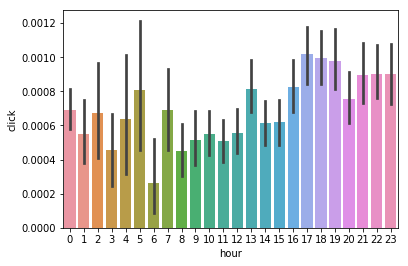

In [17]:
plt
sns.barplot('hour','click',data=train)

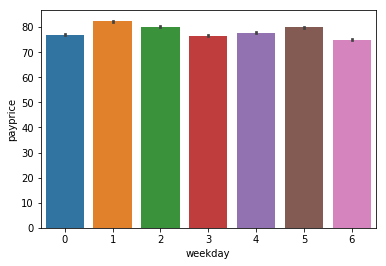

In [18]:
sns.barplot('weekday','payprice',data=train)

In [19]:
train['platform'], train['browser'] = zip(*train['useragent'].map(lambda x: x.split('_')))

In [170]:
train['slotsize']=train['slotheight']*train['slotwidth']

In [171]:
t1458=train[train.advertiser==1458]
t3386=train[train.advertiser==3386]

In [172]:
t1458.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,platform,browser,slotsize
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie,96000
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1.0,...,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110",windows,ie,94080
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1.0,...,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111",windows,ie,96000
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3.0,...,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110",windows,ie,90000
12,0,2,21,83be02e32b55209c39ae3f0b76f0149f73585910,f39780ed2b506f3683ada7995ce789b95e2bf85b,windows_ie,114.139.26.*,298,301,1.0,...,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,NaN,windows,ie,94080


In [23]:
click1458 = pd.DataFrame()
click1458['day'] = np.sort(train.weekday.unique())
click1458['CTR']=0
for i in click1458.day.values:
    click1458.loc[click1458.day==i,'CTR']=sum(t1458[t1458.weekday==i].click==1)/t1458[t1458.weekday==i].shape[0]
click1458['advertiser']=1458

t3386=train[train.advertiser==3386]
click3386 = pd.DataFrame()
click3386['day'] = np.sort(train.weekday.unique())
click3386['CTR']=0
for i in click3386.day.values:
    click3386.loc[click3386.day==i,'CTR']=sum(t3386[t3386.weekday==i].click==1)/t3386[t3386.weekday==i].shape[0]
click3386['advertiser']=3386

hour1458 = pd.DataFrame()
hour1458['hour'] = np.sort(train.hour.unique())

hour1458['CTR']=0
for i in hour1458.hour.values:
    hour1458.loc[hour1458.hour==i,'CTR']=sum(t1458[t1458.hour==i].click==1)/t1458[t1458.hour==i].shape[0]
hour1458['advertiser']=1458

hour3386 = pd.DataFrame()
hour3386['hour'] = np.sort(train.hour.unique())
hour3386['CTR']=0
for i in hour3386.hour.values:
    hour3386.loc[hour3386.hour==i,'CTR']=sum(t3386[t3386.hour==i].click==1)/t3386[t3386.hour==i].shape[0]
hour3386['advertiser']=3386

In [62]:
platform1458 = pd.DataFrame()
platform1458['platform'] = np.sort(train.platform.unique())

platform1458['CTR']=0
for i in platform1458.platform.values:
    platform1458.loc[platform1458.platform==i,'CTR']=sum(t1458[t1458.platform==i].click==1)/t1458[t1458.platform==i].shape[0]
platform1458['advertiser']=1458

platform3386 = pd.DataFrame()
platform3386['platform'] = np.sort(train.platform.unique())
platform3386['CTR']=0
for i in platform3386.platform.values:
    platform3386.loc[platform3386.platform==i,'CTR']=sum(t3386[t3386.platform==i].click==1)/t3386[t3386.platform==i].shape[0]
platform3386['advertiser']=3386

browser1458 = pd.DataFrame()
browser1458['browser'] = np.sort(train.browser.unique())

browser1458['CTR']=0
for i in browser1458.browser.values:
    browser1458.loc[browser1458.browser==i,'CTR']=sum(t1458[t1458.browser==i].click==1)/t1458[t1458.browser==i].shape[0]
browser1458['advertiser']=1458

browser3386 = pd.DataFrame()
browser3386['browser'] = np.sort(train.browser.unique())
browser3386['CTR']=0
for i in browser3386.browser.values:
    browser3386.loc[browser3386.browser==i,'CTR']=sum(t3386[t3386.browser==i].click==1)/t3386[t3386.browser==i].shape[0]
browser3386['advertiser']=3386

adexchange1458 = pd.DataFrame()
adexchange1458['adexchange'] = np.sort(train.adexchange.unique())

adexchange1458['CTR']=0
for i in adexchange1458.adexchange.values[0:3]:
    adexchange1458.loc[adexchange1458.adexchange==i,'CTR']=np.mean(t1458[t1458.adexchange==i].click)
adexchange1458['advertiser']=1458

adexchange3386 = pd.DataFrame()
adexchange3386['adexchange'] = np.sort(train.adexchange.unique())
adexchange3386['CTR']=0
for i in adexchange3386.adexchange.values[0:3]:
    adexchange3386.loc[adexchange3386.adexchange==i,'CTR']=np.mean(t3386[t3386.adexchange==i].click)
adexchange3386['advertiser']=3386

In [63]:
adexchange3386

,adexchange,CTR,advertiser
0,1.0,0.001326,3386
1,2.0,0.000511,3386
2,3.0,0.000515,3386
3,4.0,0.000000,3386
4,NaN,0.000000,3386


In [51]:
np.sort(train.adexchange.unique())[0:4],np.sort(train.adexchange.unique()),adexchange1458['adexchange']

(array([1., 2., 3., 4.]), array([ 1.,  2.,  3.,  4., nan]), 0    1.0
 1    2.0
 Name: adexchange, dtype: float64)

In [64]:
slotsize1458 = pd.DataFrame()
slotsize1458['slotsize'] = np.sort(train.slotsize.unique())

slotsize1458['CTR']=0
for i in slotsize1458.slotsize.values:
    slotsize1458.loc[slotsize1458.slotsize==i,'CTR']=np.mean(t1458[t1458.slotsize==i].click)
slotsize1458['advertiser']=1458

slotsize3386 = pd.DataFrame()
slotsize3386['slotsize'] = np.sort(train.slotsize.unique())
slotsize3386['CTR']=0
for i in slotsize3386.slotsize.values:
    slotsize3386.loc[slotsize3386.slotsize==i,'CTR']=np.mean(t3386[t3386.slotsize==i].click)
slotsize3386['advertiser']=3386

region1458 = pd.DataFrame()
region1458['region'] = np.sort(train.region.unique())

region1458['CTR']=0
for i in region1458.region.values:
    region1458.loc[region1458.region==i,'CTR']=sum(t1458[t1458.region==i].click==1)/t1458[t1458.region==i].shape[0]
region1458['advertiser']=1458

region3386 = pd.DataFrame()
region3386['region'] = np.sort(train.region.unique())
region3386['CTR']=0
for i in region3386.region.values:
    region3386.loc[region3386.region==i,'CTR']=sum(t3386[t3386.region==i].click==1)/t3386[t3386.region==i].shape[0]
region3386['advertiser']=3386


In [68]:
adexchange3386

,adexchange,CTR,advertiser
0,1.0,0.001326,3386
1,2.0,0.000511,3386
2,3.0,0.000515,3386


In [69]:
adexchange1458=adexchange1458.loc[0:2]
adexchange3386=adexchange3386.loc[0:2]
to_plot = click1458.append(click3386)
to_plot1 = hour1458.append(hour3386)
to_plot2 = platform1458.append(platform3386)
to_plot3 = browser1458.append(browser3386)
to_plot4 = adexchange1458.append(adexchange3386)
to_plot5= slotsize1458.append(slotsize3386)

In [70]:
to_plot6= region1458.append(region3386)

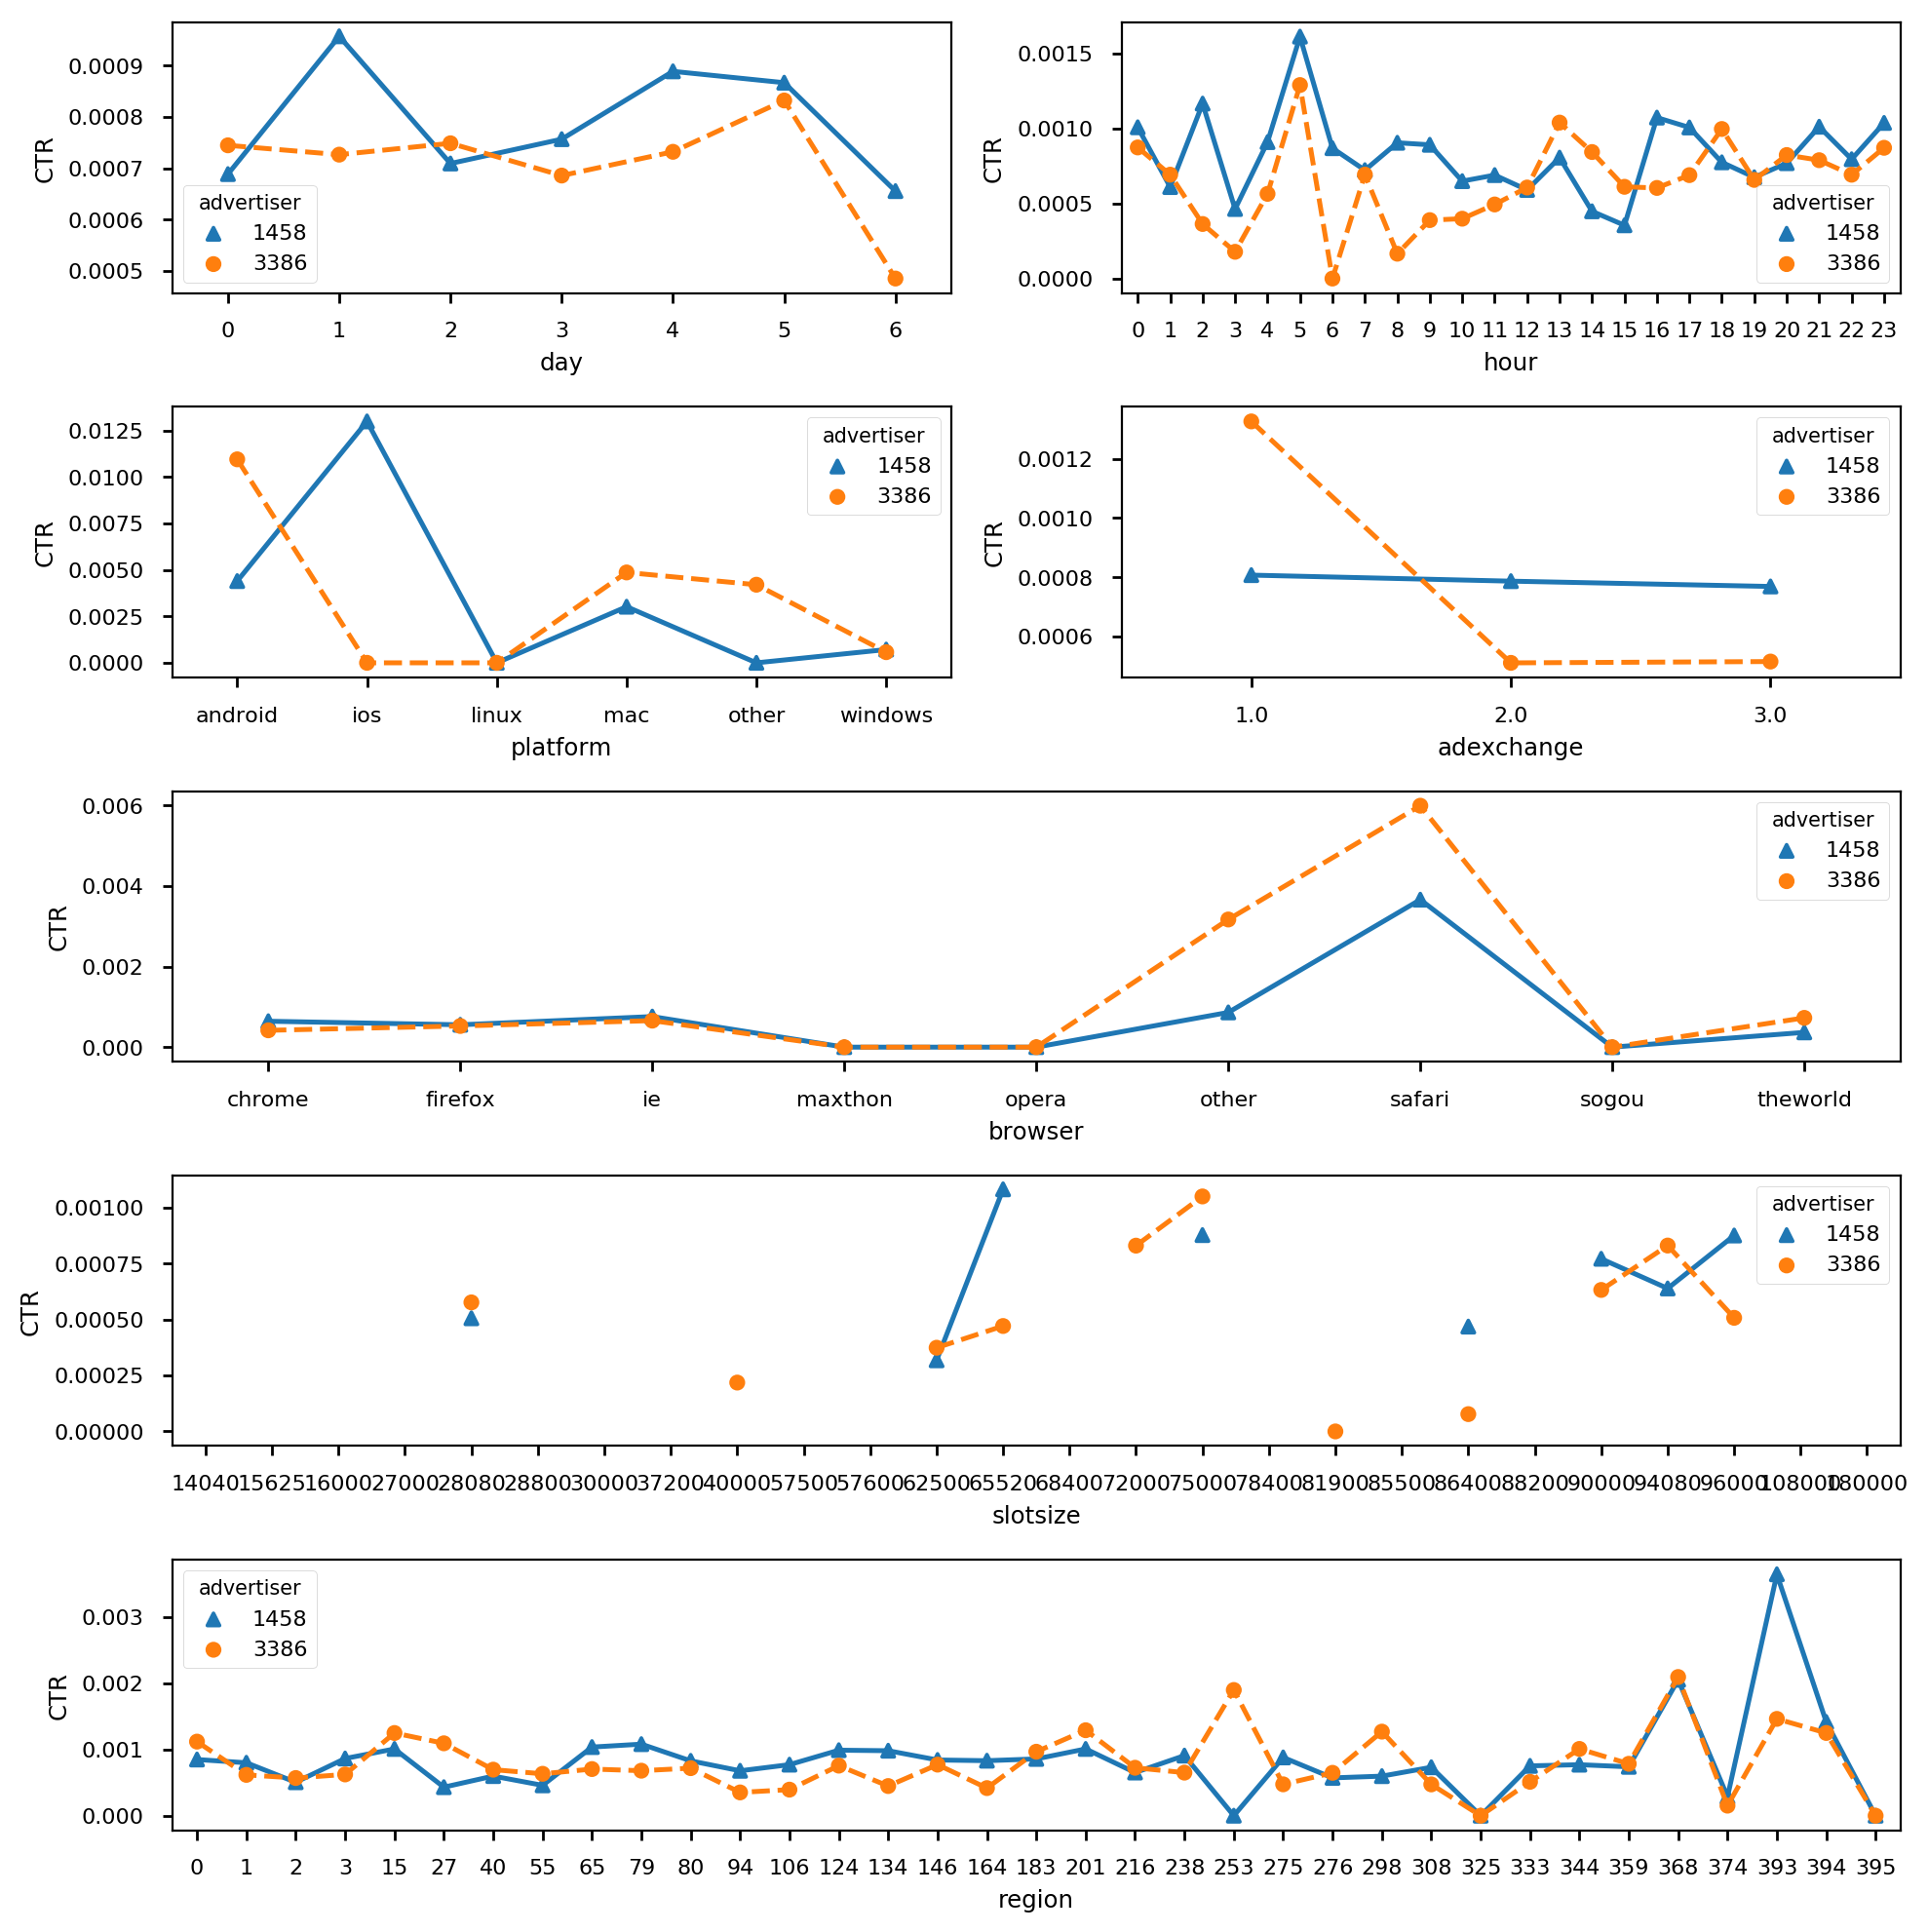

In [71]:
to_plot6= region1458.append(region3386)


plt.figure(figsize=(10,10), dpi=200)
sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 1.5})
ax1 = plt.subplot2grid((5, 2), (0, 0), colspan=1)
sns.set_context( font_scale=1.5, rc={"lines.linewidth":1})
sns.factorplot(x='day', y='CTR', data=to_plot, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"],ax=ax1)
plt.close()

ax2 = plt.subplot2grid((5, 2), (0, 1), colspan=1)
sns.factorplot(x='hour', y='CTR', data=to_plot1, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"], ax=ax2)
plt.close()

ax3 = plt.subplot2grid((5, 2), (1, 0), colspan=1)
sns.factorplot(x='platform', y='CTR', data=to_plot2, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"], ax=ax3)
plt.close()

ax4 = plt.subplot2grid((5, 2), (2, 0), colspan=2)
sns.factorplot(x='browser', y='CTR', data=to_plot3, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"], ax=ax4)
plt.close()

ax5 = plt.subplot2grid((5, 2), (1, 1), colspan=1)
sns.factorplot(x='adexchange', y='CTR', data=to_plot4, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"], ax=ax5)
plt.close()

ax6 = plt.subplot2grid((5, 2), (3, 0), colspan=2)
sns.factorplot(x='slotsize', y='CTR', data=to_plot5, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"], ax=ax6)

plt.close()

ax7 = plt.subplot2grid((5, 2), (4, 0), colspan=2)
sns.factorplot(x='region', y='CTR', data=to_plot6, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"], ax=ax7)

plt.close()

plt.tight_layout()
plt.savefig('ctr.png')
plt.show()

In [193]:
click1458 = pd.DataFrame()
click1458['day'] = np.sort(train.weekday.unique())
click1458['payprice']=0
for i in click1458.day.values:
    click1458.loc[click1458.day==i,'payprice']=np.mean(t1458[t1458.weekday==i].payprice.values)
click1458['advertiser']=1458

t3386=train[train.advertiser==3386]
click3386 = pd.DataFrame()
click3386['day'] = np.sort(train.weekday.unique())
click3386['payprice']=0
for i in click3386.day.values:
    click3386.loc[click3386.day==i,'payprice']=np.mean(t3386[t3386.weekday==i].payprice.values)
click3386['advertiser']=3386

hour1458 = pd.DataFrame()
hour1458['hour'] = np.sort(train.hour.unique())

hour1458['payprice']=0
for i in hour1458.hour.values:
    hour1458.loc[hour1458.hour==i,'payprice']=np.mean(t1458[t1458.hour==i].payprice.values)
hour1458['advertiser']=1458

hour3386 = pd.DataFrame()
hour3386['hour'] = np.sort(train.hour.unique())
hour3386['payprice']=0
for i in hour3386.hour.values:
    hour3386.loc[hour3386.hour==i,'payprice']=np.mean(t3386[t3386.hour==i].payprice.values)
hour3386['advertiser']=3386

In [194]:
platform1458 = pd.DataFrame()
platform1458['platform'] = np.sort(train.platform.unique())
platform1458['payprice']=0
for i in platform1458.platform.values:
    platform1458.loc[platform1458.platform==i,'payprice']=np.mean(t1458[t1458.platform==i].payprice.values)
platform1458['advertiser']=1458

t3386=train[train.advertiser==3386]
platform3386 = pd.DataFrame()
platform3386['platform'] = np.sort(train.platform.unique())
platform3386['payprice']=0
for i in platform3386.platform.values:
    platform3386.loc[platform3386.platform==i,'payprice']=np.mean(t3386[t3386.platform==i].payprice.values)
platform3386['advertiser']=3386

browser1458 = pd.DataFrame()
browser1458['browser'] = np.sort(train.browser.unique())

browser1458['payprice']=0
for i in browser1458.browser.values:
    browser1458.loc[browser1458.browser==i,'payprice']=np.mean(t1458[t1458.browser==i].payprice.values)
browser1458['advertiser']=1458

browser3386 = pd.DataFrame()
browser3386['browser'] = np.sort(train.browser.unique())
browser3386['payprice']=0
for i in browser3386.browser.values:
    browser3386.loc[browser3386.browser==i,'payprice']=np.mean(t3386[t3386.browser==i].payprice.values)
browser3386['advertiser']=3386

In [195]:
adexchange1458 = pd.DataFrame()
adexchange1458['adexchange'] = np.sort(train.adexchange.unique())

adexchange1458['payprice']=0
for i in adexchange1458.adexchange.values:
    adexchange1458.loc[adexchange1458.adexchange==i,'payprice']=np.mean(t1458[t1458.adexchange==i].payprice.values)
adexchange1458['advertiser']=1458

adexchange3386 = pd.DataFrame()
adexchange3386['adexchange'] = np.sort(train.adexchange.unique())
adexchange3386['payprice']=0
for i in adexchange3386.adexchange.values:
    adexchange3386.loc[adexchange3386.adexchange==i,'payprice']=np.mean(t3386[t3386.adexchange==i].payprice.values)
adexchange3386['advertiser']=3386


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [196]:
slotsize1458 = pd.DataFrame()
slotsize1458['slotsize'] = np.sort(train.slotsize.unique())

slotsize1458['payprice']=0
for i in slotsize1458.slotsize.values:
    slotsize1458.loc[slotsize1458.slotsize==i,'payprice']=np.mean(t1458[t1458.slotsize==i].payprice.values)
slotsize1458['advertiser']=1458

slotsize3386 = pd.DataFrame()
slotsize3386['slotsize'] = np.sort(train.slotsize.unique())
slotsize3386['payprice']=0
for i in slotsize3386.slotsize.values:
    slotsize3386.loc[slotsize3386.slotsize==i,'payprice']=np.mean(t3386[t3386.slotsize==i].payprice.values)
slotsize3386['advertiser']=3386

region1458 = pd.DataFrame()
region1458['region'] = np.sort(train.region.unique())

region1458['payprice']=0
for i in region1458.region.values:
    region1458.loc[region1458.region==i,'payprice']=np.mean(t1458[t1458.region==i].payprice.values)
region1458['advertiser']=1458

region3386 = pd.DataFrame()
region3386['region'] = np.sort(train.region.unique())
region3386['payprice']=0
for i in region3386.region.values:
    region3386.loc[region3386.region==i,'payprice']=np.mean(t3386[t3386.region==i].payprice.values)
region3386['advertiser']=3386

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [197]:
adexchange1458=adexchange1458.loc[0:2]
adexchange3386=adexchange3386.loc[0:2]

In [198]:
to_plot = click1458.append(click3386)
to_plot1 = hour1458.append(hour3386)
to_plot2 = platform1458.append(platform3386)
to_plot3 = browser1458.append(browser3386)
to_plot4 = adexchange1458.append(adexchange3386)
to_plot5 = slotsize1458.append(slotsize3386)
to_plot6 = region1458.append(region3386)

In [199]:
to_plot5=to_plot5.dropna(axis=0,how='any') 

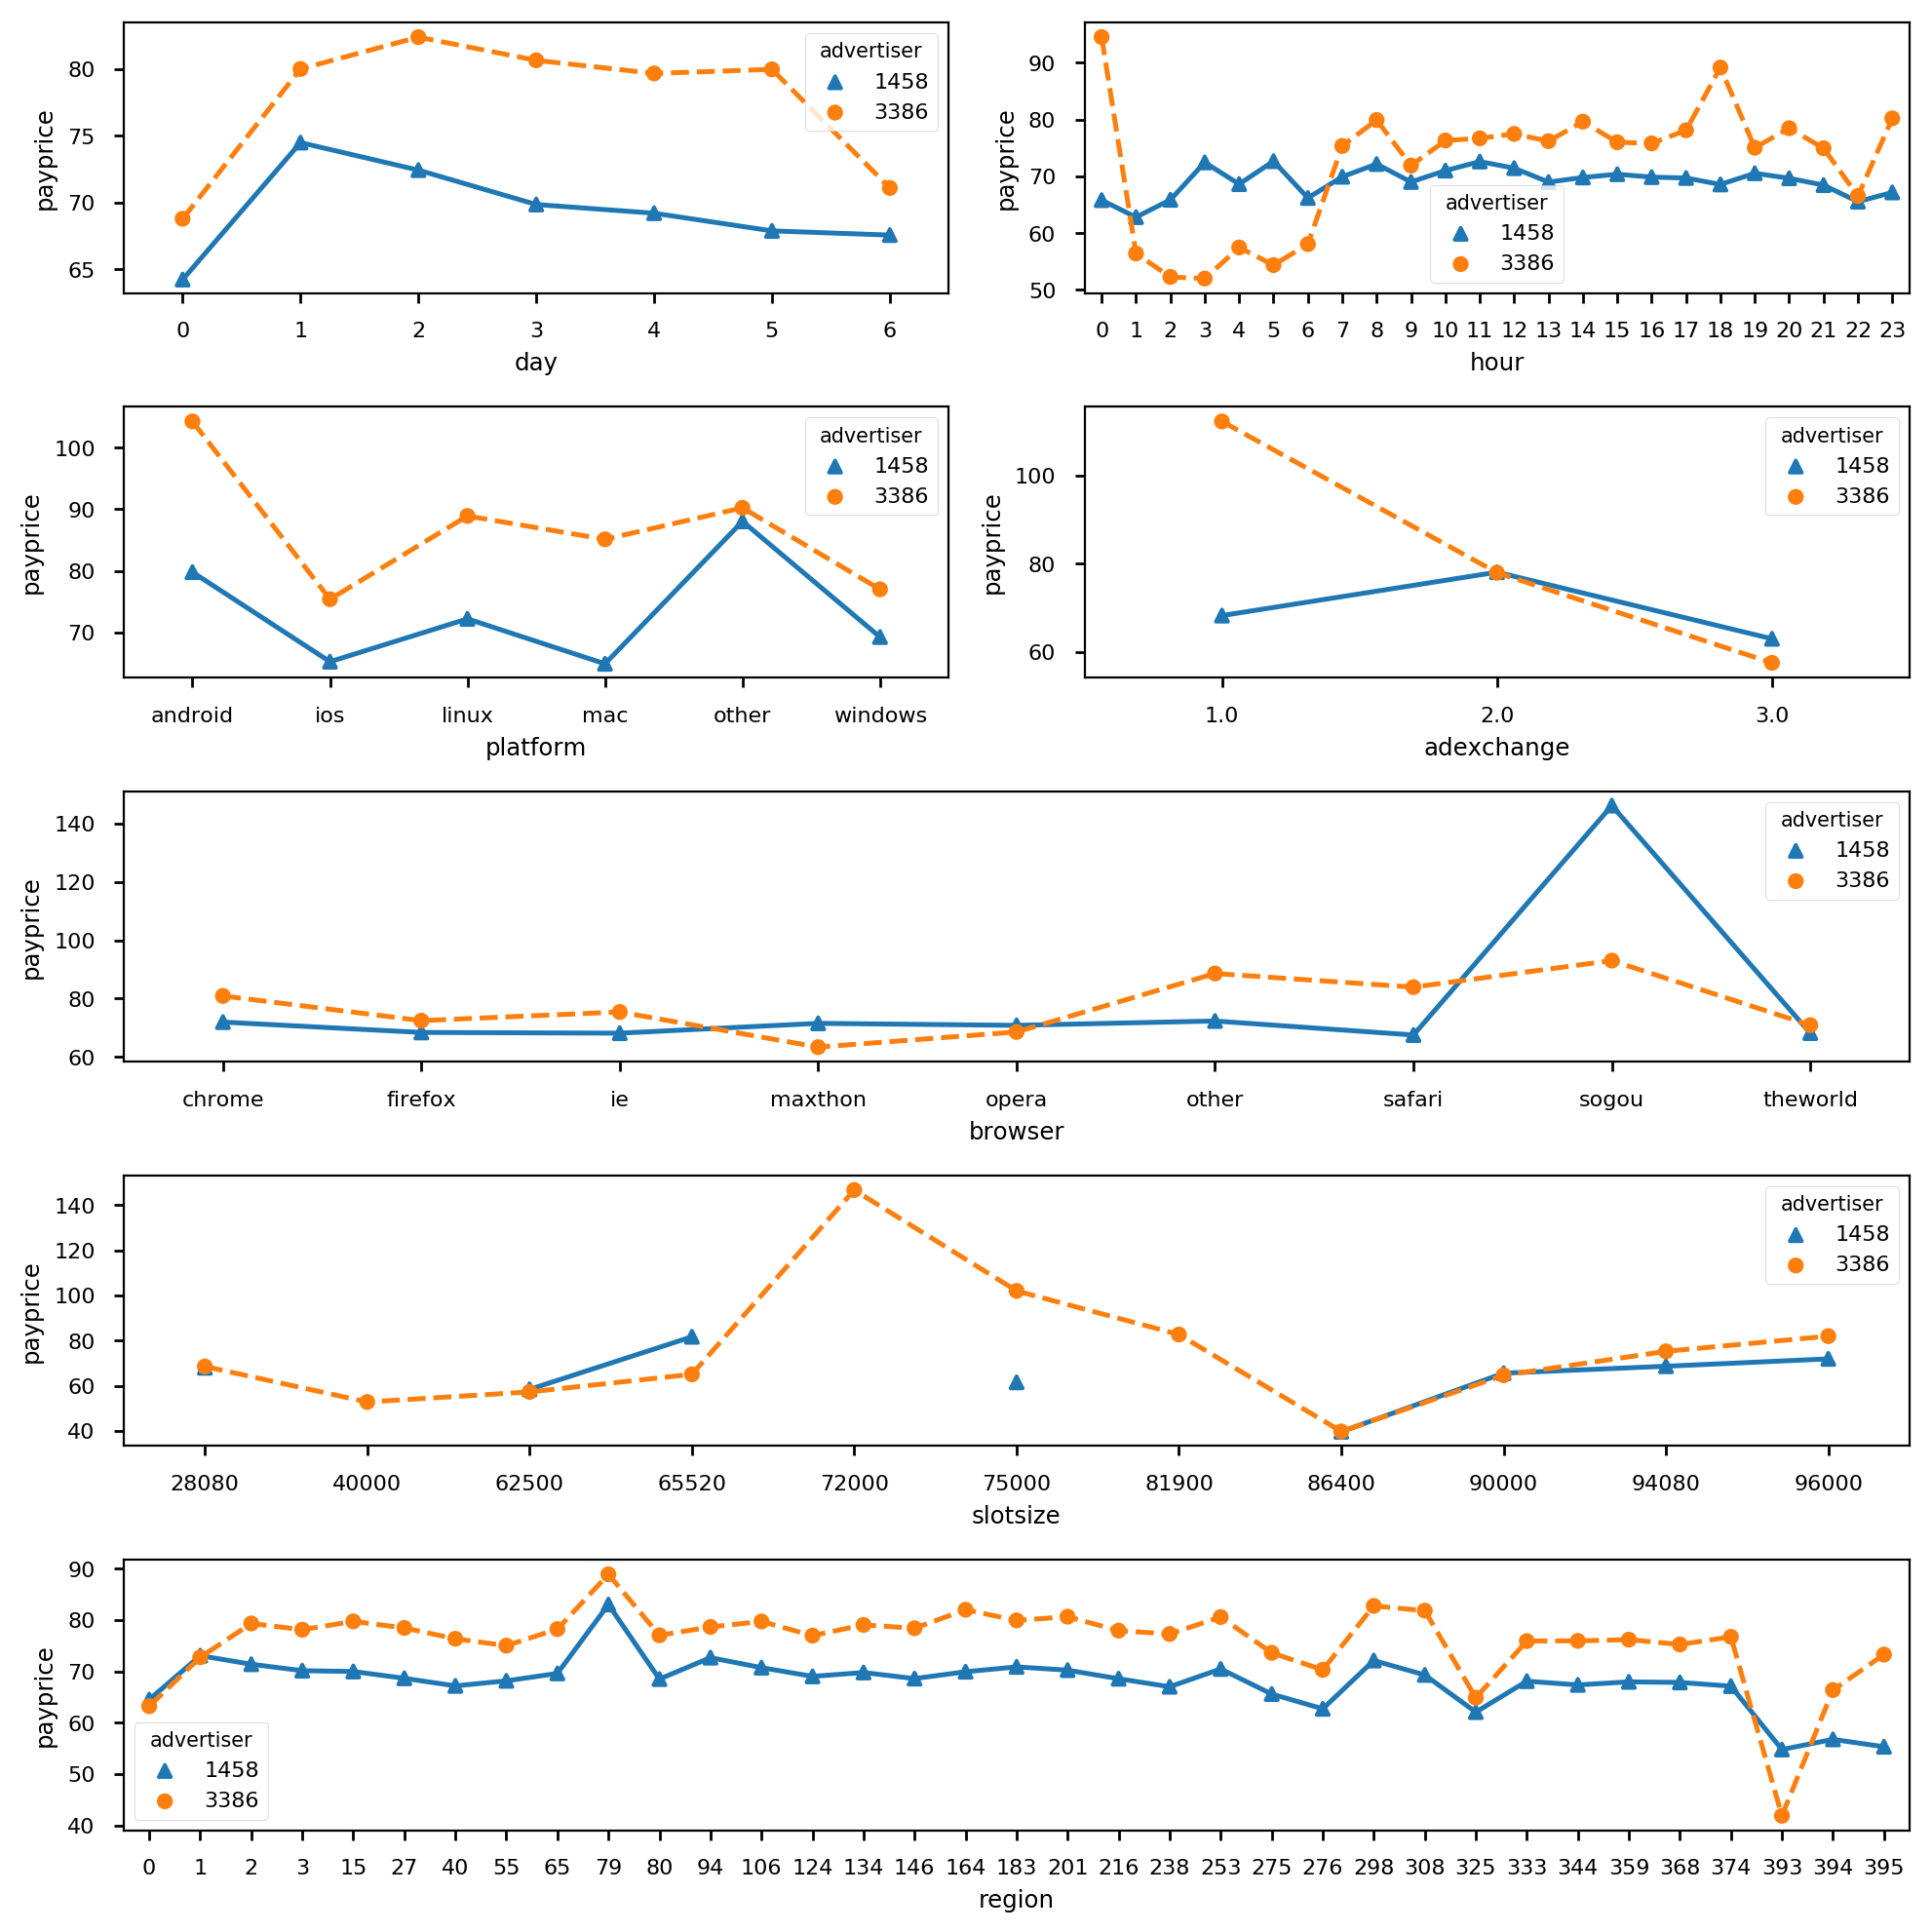

In [200]:
plt.figure(figsize=(10,10), dpi=200)
sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 1.5})

ax1 = plt.subplot2grid((5, 2), (0, 0), colspan=1)
sns.set_context( font_scale=1.5, rc={"lines.linewidth":1})
sns.factorplot(x='day', y='payprice', data=to_plot, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"],ax=ax1)
plt.close()

ax2 = plt.subplot2grid((5, 2), (0, 1), colspan=1)
sns.factorplot(x='hour', y='payprice', data=to_plot1, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"], ax=ax2)
plt.close()

ax3 = plt.subplot2grid((5, 2), (1, 0), colspan=1)
sns.factorplot(x='platform', y='payprice', data=to_plot2, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"], ax=ax3)
plt.close()

ax4 = plt.subplot2grid((5, 2), (2, 0), colspan=2)
sns.factorplot(x='browser', y='payprice', data=to_plot3, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"], ax=ax4)
plt.close()

ax5 = plt.subplot2grid((5, 2), (1, 1), colspan=1)
sns.factorplot(x='adexchange', y='payprice', data=to_plot4, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"], ax=ax5)
plt.close()

ax6 = plt.subplot2grid((5, 2), (3, 0), colspan=2)
sns.factorplot(x='slotsize', y='payprice', data=to_plot5, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"], ax=ax6)

plt.close()

ax7 = plt.subplot2grid((5, 2), (4, 0), colspan=2)
sns.factorplot(x='region', y='payprice', data=to_plot6, hue='advertiser',
              markers=["^", "o"], linestyles=["-", "--"], ax=ax7)

plt.close()

plt.tight_layout()
plt.savefig('price.png')
plt.show()

In [149]:
print(x)
print(x_va)

+-----+------+---------+---------+--------+-----+------+--------+
|Adv  |Clicks|   Bids  |   Imps  |  CTR   | CPM | eCPC |  Cost  |
+-----+------+---------+---------+--------+-----+------+--------+
|1458 | 384  | 487908.0| 487908.0|0.000787|69.27|88.01 |33797.0 |
|2259 |  43  | 132847.0| 132847.0|0.000324|93.22|288.0 |12384.0 |
|2261 |  36  | 109910.0| 109910.0|0.000328|89.66|273.75| 9855.0 |
|2821 | 131  | 211091.0| 211091.0|0.000621|89.13|143.63|18815.0 |
|2997 | 214  | 48979.0 | 48979.0 |0.004369| 62.7|14.35 | 3071.0 |
|3358 | 202  | 264956.0| 264956.0|0.000762|84.72|111.12|22447.0 |
|3386 | 317  | 449269.0| 449269.0|0.000706|77.31|109.57|34733.0 |
|3427 | 272  | 402805.0| 402805.0|0.000675|75.62|111.98|30459.0 |
|3476 | 187  | 310813.0| 310813.0|0.000602|76.96|127.91|23919.0 |
|Total| 1786 |2418578.0|2418578.0|0.000738|78.34|106.09|189480.0|
+-----+------+---------+---------+--------+-----+------+--------+
+-----+------+--------+--------+--------+-----+------+-------+
|Adv  |Clicks

In [92]:
train.advertiser.value_counts()

1458    492353
3386    455041
3427    402806
3476    310835
3358    264956
2821    211366
2259    133673
2261    110122
2997     49829
Name: advertiser, dtype: int64

In [93]:
ad.loc[ad.index==1458].click.values[0]

385

In [20]:
ad

,click,bidprice,payprice,Cost,Imps,CTR,eCPC
advertiser,,,,,,,
1458,385,300.000000,68.992646,33969.0,1.0,0.000781959,88.231169
2259,43,288.078939,92.974931,12428.0,1.0,0.000321681,289.023256
2261,36,287.877981,89.662184,9874.0,1.0,0.00032691,274.277778
2821,131,290.224894,89.077922,18828.0,1.0,0.000619778,143.725191
2997,217,277.000000,62.800116,3129.0,1.0,0.00435489,14.419355
3358,202,232.981091,84.720599,22447.0,1.0,0.000762391,111.123762
3386,320,300.000000,76.766320,34932.0,1.0,0.000703233,109.162500
3427,272,236.388882,75.616329,30459.0,1.0,0.000675263,111.981618
3476,187,247.856152,76.950083,23919.0,1.0,0.000601605,127.909091


In [32]:
ad['ctr']

advertiser
1458    0.000782
2259    0.000322
2261    0.000327
2821    0.000620
2997    0.004355
3358    0.000762
3386    0.000703
3427    0.000675
3476    0.000602
Name: ctr, dtype: float64

In [106]:
ad

,click,bidprice,payprice,hour,ctr
advertiser,,,,,
1458,385,300.000000,68.992646,14.071445,0.000782
2259,43,288.078939,92.974931,10.480853,0.000322
2261,36,287.877981,89.662184,11.964285,0.000327
2821,131,290.224894,89.077922,16.050997,0.000620
2997,217,277.000000,62.800116,17.154227,0.004355
3358,202,232.981091,84.720599,12.144062,0.000762
3386,320,300.000000,76.766320,13.779347,0.000703
3427,272,236.388882,75.616329,13.722705,0.000675
3476,187,247.856152,76.950083,12.490978,0.000602


In [ ]:
data_1458=train[]

In [38]:
valid=pd.read_csv('validation.csv')

In [39]:
print(valid['bidprice'][0],valid['payprice'][0])

300 23
